In [1]:
import numpy as np 
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS , summarize , poly)
Boston = load_data("Boston") 

In [3]:
Boston = load_data("Boston") 

print(Boston.columns)
X = pd.DataFrame ({'intercept ': np.ones(Boston.shape [0]), 'lstat ': Boston['lstat']}) 
X[:4]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [6]:
y = Boston['medv']
model = sm.OLS(y, X) 
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


#### .fit() y .transform()
The fit() method takes the original array and may do some initial com- putations on it, as specified in the transform object. For example, it may compute means and standard deviations for centering and scaling. The transform() method applies the fitted transformation to the array of data, and produces the model matrix.

In [8]:
design = MS(['lstat']) 
design = design.fit(Boston) 
X = design.transform(Boston) 
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [10]:
# Mismo que antes, ambas operaciones combinadas
design = MS(['lstat']) 
X = design.fit_transform(Boston) 
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [11]:
results.summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        17:23:13   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results.params 

intercept     34.553841
lstat         -0.950049
dtype: float64

In [15]:
new_df = pd.DataFrame ({'lstat':[5, 10, 15]}) 
newX = design.transform(new_df) 
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [16]:
new_predictions = results.get_prediction(newX); 
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [22]:
new_predictions.conf_int(alpha =0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [19]:
new_predictions.conf_int(obs=True , alpha =0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

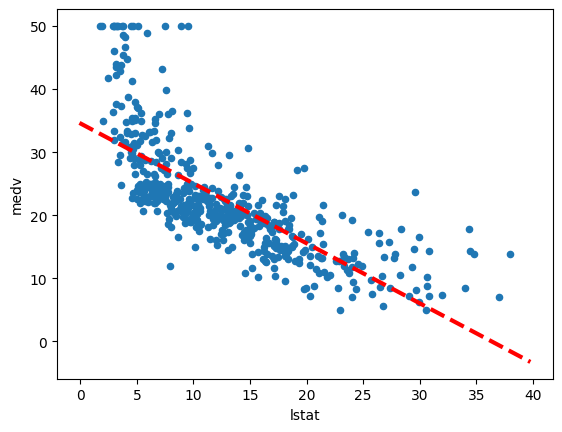

In [26]:
def abline(ax , b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax" 
    xlim = ax.get_xlim () 
    ylim = [m * xlim [0] + b, m * xlim [1] + b] 
    ax.plot(xlim , ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv') 
abline(ax , results.params [0], results.params [1], 'r--', linewidth =3)

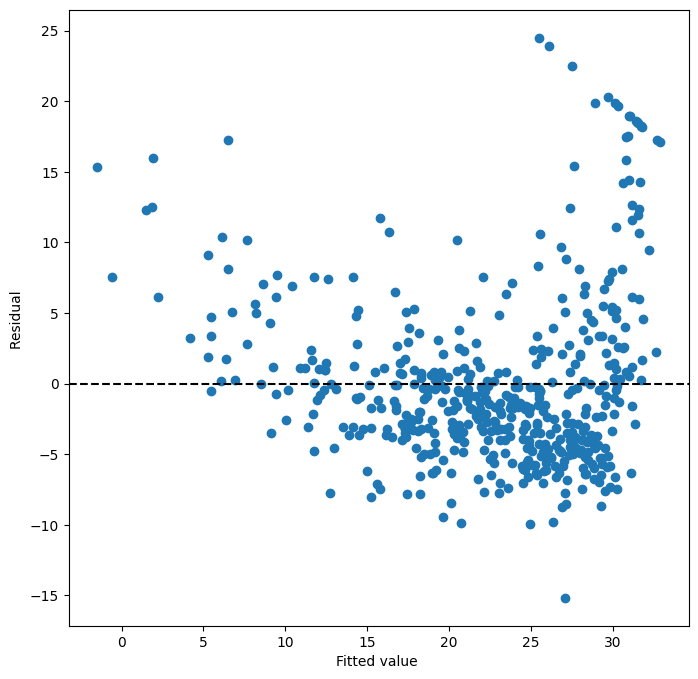

In [27]:
ax = subplots(figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid) 
ax.set_xlabel('Fitted value ') 
ax.set_ylabel('Residual ') 
ax.axhline(0, c='k', ls='--');

374

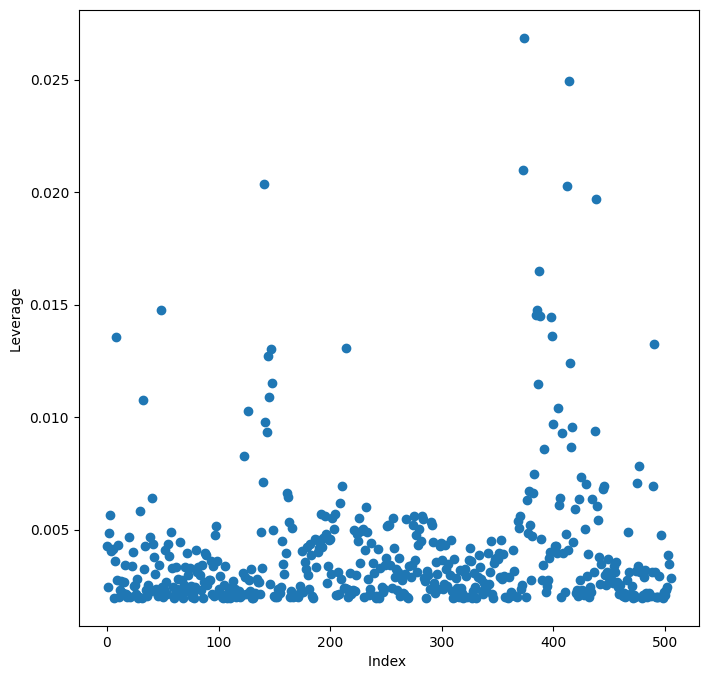

In [28]:
infl = results.get_influence ()
ax = subplots(figsize =(8 ,8))[1] 
ax.scatter(np.arange(X.shape [0]), infl.hat_matrix_diag) 
ax.set_xlabel('Index ') 
ax.set_ylabel('Leverage ') 
np.argmax(infl.hat_matrix_diag)

## MLR

In [32]:
X = MS(['lstat', 'age']).fit_transform(Boston) 
model1 = sm.OLS(y, X) 
results1 = model1.fit() 
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [35]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [40]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit() 
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [44]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston) 
model1 = sm.OLS(y, Xma) 
summarize(model1.fit())
model1.fit().rsquared
np.sqrt(results.scale)

4.798034335596368